In [5]:
import sys, os
sys.path.append(os.pardir)
sys.path.append(os.curdir)
import numpy as np
import matplotlib.pyplot as plt
import axon
from axon import optimizers
from axon import Model
import axon.functions as F
import axon.layers as L
from axon import DataLoader

max_epoch = 100
batch_size = 30
hidden_size = 10
lr = 1.0

train_set = axon.datasets.Spiral(train=True)
test_set = axon.datasets.Spiral(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)
        self.bn1 = L.BatchNorm()

    def forward(self, x):
        # linear -> batch norm -> sigmoid -> linear
        y = F.sigmoid(self.bn1(self.l1(x)))
        y = self.l2(y)
        return y

model = TwoLayerNet(hidden_size, 3)
optimizer = optimizers.SGD(lr).setup(model)

for epoch in range(max_epoch):
    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
    if epoch % 10 == 0:
        print('loss:', loss.data)

loss: 0.9414555
loss: 0.8085303
loss: 0.78823435
loss: 0.5591081
loss: 0.49664968
loss: 0.41027057
loss: 0.23843445
loss: 0.27782103
loss: 0.12270941
loss: 0.22919029


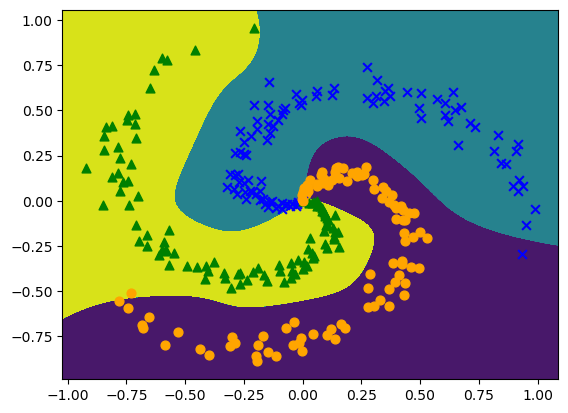

In [6]:
# Plot
x = np.array([example[0] for example in train_set])
t = np.array([example[1] for example in train_set])
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()] # 将xx和yy中的元素一一对应生成二维数组，即生成网格坐标点

with axon.test_mode():
    score = model(X)

predict_cls = np.argmax(axon.core.as_numpy(score.data), axis=1) # 获得数据点所属类别
Z = predict_cls.reshape(xx.shape) # 使之与坐标网格的形状相同
plt.contourf(xx, yy, Z) # 绘制分类等高线区域

N, CLS_NUM = 100, 3
markers = ['o', 'x', '^'] # 绘制各个数据的形状
colors = ['orange', 'blue', 'green'] # 绘制各个数据的颜色
for i in range(len(x)):
    c = t[i]
    plt.scatter(x[i][0], x[i][1],s=40,  marker=markers[c], c=colors[c]) # 绘制数据点
plt.show()